In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import expon 

In [3]:
data2 = np.loadtxt("output2.txt",dtype=np.dtype('u8'))

In [4]:
data2.size

1016500

In [5]:
data2[:50]

array([9223372036854780224, 4611686018427395956, 4611686018427397172,
       4611686018427398876, 4611686018427399904, 9223372036854789448,
       4611686018427402528, 9223372036854792672, 9223372036854795624,
       9223372036854796364, 4611686018427412616, 9223372036854803292,
       9223372036854806464, 9223372036854808408, 9223372036854808748,
       4611686018427421768, 4611686018427422784, 4611686018427422992,
       9223372036854812436, 9223372036854815028, 9223372036854816184,
       4611686018427430028, 9223372036854828936, 9223372036854831408,
       4611686018427446728, 4611686018427448048, 9223372036854843672,
       4611686018427457996, 4611686018427460872, 9223372036854854080,
       9223372036854857408, 4611686018427472448, 4611686018427479168,
       4611686018427484872, 4611686018427485320, 9223372036854873320,
       9223372036854877336, 4611686018427492760, 4611686018427495800,
       4611686018427496568, 9223372036854886352, 9223372036854891420,
       4611686018427

In [6]:
print(9223372036854780224-2**63)

4416


In [7]:
print(4611686018427395956-2**62)

8052


In [8]:
data2_ch1=data2[(data2 & 2**63) >0] & (2**62-1)
print(data2_ch1.size)

551156


In [9]:
data2_ch2=data2[(data2 & 2**62) >0] & (2**62-1)
print(data2_ch2.size)

465426


In [10]:
print(data2_ch1.size+data2_ch2.size)

1016582


In [11]:
data2_ch12 = data2[np.logical_and((data2 & 2**63) >0,(data2 & 2**62) >0)] & (2**62-1)

In [12]:
print(data2_ch12.size)

82


In [13]:
diff_ch1 = np.ediff1d(data2_ch1)*0.0125
diff_ch2 = np.ediff1d(data2_ch2)*0.0125
print(1e6/diff_ch1.mean())
print(1e6/diff_ch2.mean())

14458.021019
12209.2062449


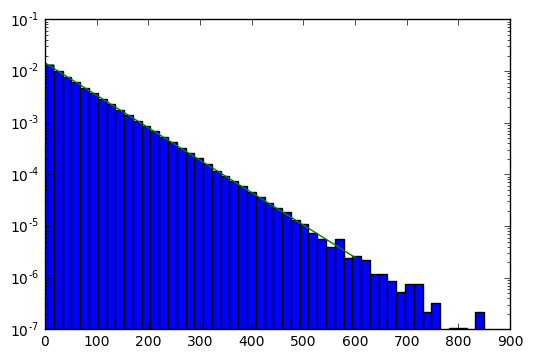

In [26]:
diffx=np.linspace(0,600,1000)
ch1=plt.hist(diff_ch1, bins=50, normed=True)
plt.plot(diffx,expon.pdf(diffx,scale=diff_ch1.mean()))
plt.yscale('log')

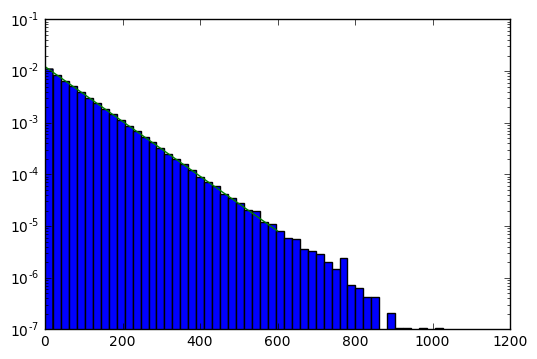

In [27]:
ch2=plt.hist(diff_ch2, bins=50, normed=True)
plt.plot(diffx,expon.pdf(diffx,scale=diff_ch2.mean()))
plt.yscale('log')

In [16]:
ch1[0]

array([  1.30585649e-02,   9.94045058e-03,   7.74868537e-03,
         6.09402541e-03,   4.73765050e-03,   3.75856239e-03,
         2.91954229e-03,   2.29339991e-03,   1.77113418e-03,
         1.41263698e-03,   1.09513529e-03,   8.65603133e-04,
         6.84753144e-04,   5.35290344e-04,   4.16574177e-04,
         3.22519371e-04,   2.63695084e-04,   2.03696445e-04,
         1.58964364e-04,   1.18716167e-04,   9.48021191e-05,
         7.54787142e-05,   5.88242879e-05,   4.56929133e-05,
         3.62981087e-05,   2.80776546e-05,   2.28464566e-05,
         1.86828501e-05,   1.32381337e-05,   1.11029509e-05,
         7.47314002e-06,   5.65823459e-06,   3.95008830e-06,
         5.55147544e-06,   2.45546029e-06,   2.66897858e-06,
         2.24194201e-06,   1.17435057e-06,   1.17435057e-06,
         8.54073145e-07,   5.33795716e-07,   7.47314002e-07,
         7.47314002e-07,   2.13518286e-07,   3.20277429e-07,
         0.00000000e+00,   1.06759143e-07,   1.06759143e-07,
         0.00000000e+00,

In [17]:
e = expon(scale = 100)
simdata = e.rvs(size=500000)

In [18]:
simdata.mean()

99.979893253216474

In [19]:
time_stamps = np.cumsum(simdata)

In [20]:
time_stamps.size

500000

In [21]:
n = 100000
indices = np.full(time_stamps.shape, False, bool)
randices = np.random.choice(np.arange(indices.shape[0]), n, replace = False)
indices[randices] = True

time_stamps_remaining = time_stamps[~indices]

In [22]:
time_stamps_remaining.size

400000

In [23]:
diff_sim = np.ediff1d(time_stamps_remaining)

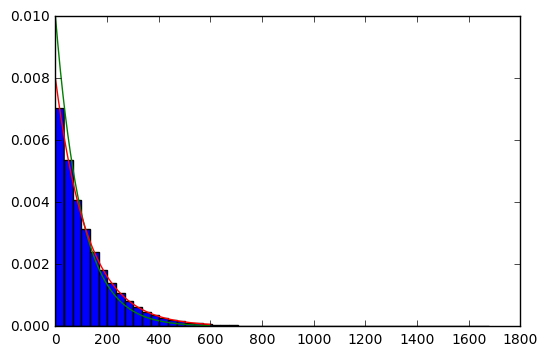

In [24]:
sim = plt.hist(diff_sim, bins=50,normed=True)
plt.plot(diffx,expon.pdf(diffx,scale=100))
plt.plot(diffx,expon.pdf(diffx,scale=diff_sim.mean()))

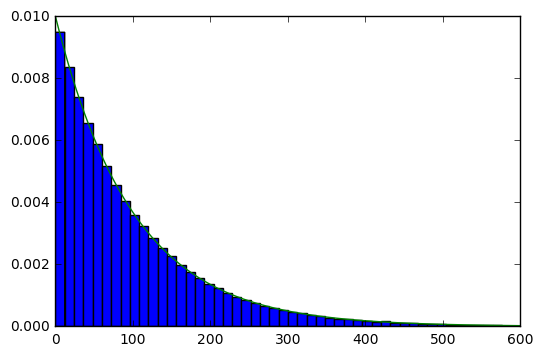

In [25]:
sim = plt.hist(simdata, bins=50, range=(0,600),normed=True)
plt.plot(diffx,expon.pdf(diffx,scale=100))